In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from pathlib import Path
import pandas as pd

In [2]:
c = 2.99792458E10  # cm per sec, light speed
h = 6.626070040812E-27  # erg*sec, Planck constant
k = 1.380648528E-16  # erg/K, Boltzmann constant
sun_radius = 695700 * 10 ** 5 #cm
parsec = 3.086e+18 #cm

In [3]:
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw3/')
fig_dir =  Path('./../reports/figures/')
files = {'0.3' : data_dir/'LOGS_03/',
         '0.5' : data_dir/'LOGS_05/',
         '1' : data_dir/'LOGS_1/',
         '2' : data_dir/'LOGS_2/',
         '5' : data_dir/'LOGS_5/'
        }

colors_data = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange']

In [4]:
star03  = pd.read_csv(files['0.3'] / '03M.data', sep='\s+', header=4)
star05  = pd.read_csv(files['0.5'] / '05M.data', sep='\s+', header=4)
star1   = pd.read_csv(files['1']   / '1M.data', sep='\s+', header=4)
star2   = pd.read_csv(files['2']   / '2M.data', sep='\s+', header=4)
star5   = pd.read_csv(files['5']   / '5M.data', sep='\s+', header=4)

In [5]:
star03 = star03[star03['star_age'] > 1e5]
star05 = star05[star05['star_age'] > 1e5]
star1 = star1[star1['star_age'] > 1e5]
star2 = star2[star2['star_age'] > 1e5]
star5 = star5[star5['star_age'] > 1e5]

In [6]:
rainbow = cm.get_cmap('rainbow')
norm=plt.Normalize(-3,0)

<ipython-input-7-e11e69be4920>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
<ipython-input-7-e11e69be4920>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)


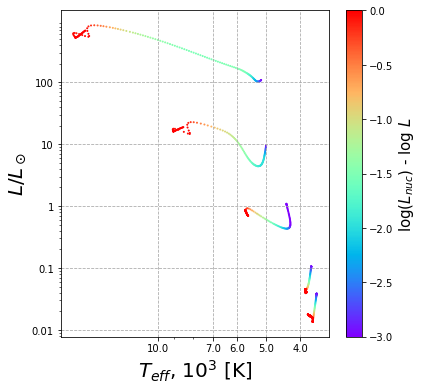

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

x = ax.scatter(np.power(10, star1['log_Teff']), np.power(10, star1['log_L']), 
        s=1, c=star1['log_Lnuc_sub_log_L'], cmap='rainbow', norm=norm, label=r'$M = 1 M_{\odot}$')
ax.scatter(np.power(10, star05['log_Teff']), np.power(10, star05['log_L']), 
        s=1, c=star05['log_Lnuc_sub_log_L'], cmap=x.cmap, label=r'$M = 0.5 M_{\odot}$')
ax.scatter(np.power(10, star03['log_Teff']), np.power(10, star03['log_L']), 
        s=1, c=star03['log_Lnuc_sub_log_L'], cmap=x.cmap, label=r'$M = 0.3 M_{\odot}$')
ax.scatter(np.power(10, star2['log_Teff']), np.power(10, star2['log_L']), 
        s=1, c=star2['log_Lnuc_sub_log_L'], cmap=x.cmap, label=r'$M = 2 M_{\odot}$')
ax.scatter(np.power(10, star5['log_Teff']), np.power(10, star5['log_L']), 
        s=1, c=star5['log_Lnuc_sub_log_L'], cmap=x.cmap, label=r'$M = 5 M_{\odot}$')
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)
ax.set_xticks(     [4000, 5000, 6000, 7000, 10000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(x)
cb.set_label(r'log($L_{nuc}$) - log $L$', fontsize=15)
plt.savefig(fig_dir / '3HR_logLnuc.png', dpi=300, bbox_inches='tight')

In [8]:
norm=plt.Normalize(0,1)

<ipython-input-9-c850adfb926a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
<ipython-input-9-c850adfb926a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)


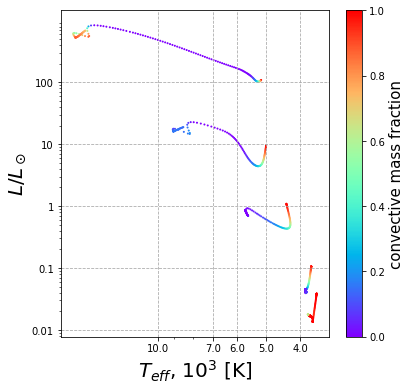

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
y = ax.scatter(np.power(10, star03['log_Teff']), np.power(10, star03['log_L']), 
        s=1, c=star03['conv_mx1_top'] - star03['conv_mx1_bot'] , cmap='rainbow', norm=norm, label=r'$M = 0.3 M_{\odot}$')
ax.scatter(np.power(10, star05['log_Teff']), np.power(10, star05['log_L']), 
        s=1, c=star05['conv_mx1_top'] - star05['conv_mx1_bot'] , cmap=y.cmap, label=r'$M = 0.5 M_{\odot}$')
ax.scatter(np.power(10, star1['log_Teff']), np.power(10, star1['log_L']), 
        s=1, c=star1['conv_mx1_top'] - star1['conv_mx1_bot'] , cmap=y.cmap, label=r'$M = 1 M_{\odot}$')
ax.scatter(np.power(10, star2['log_Teff']), np.power(10, star2['log_L']), 
        s=1, c=star2['conv_mx1_top'] - star2['conv_mx1_bot'] , cmap=y.cmap, label=r'$M = 2 M_{\odot}$')
ax.scatter(np.power(10, star5['log_Teff']), np.power(10, star5['log_L']), 
        s=1, c=star5['conv_mx1_top'] - star5['conv_mx1_bot'] , cmap=y.cmap, label=r'$M = 5 M_{\odot}$')
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)
ax.set_xticks(     [4000, 5000, 6000, 7000, 10000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(y)
cb.set_label('convective mass fraction', fontsize=15)
plt.savefig(fig_dir / '3HR_convmass.png', dpi=300, bbox_inches='tight')

In [10]:
min(star03['surface_li7'].values.min(), star05['surface_li7'].values.min())

1.9203014703511384e-19

In [11]:
li_min = min([star03['surface_li7'].values.min(), star05['surface_li7'].values.min(), star1['surface_li7'].values.min(), star2['surface_li7'].values.min(), star5['surface_li7'].values.min()])
li_max = max([star03['surface_li7'].values.max(), star05['surface_li7'].values.max(), star1['surface_li7'].values.max(), star2['surface_li7'].values.max(), star5['surface_li7'].values.max()])

In [12]:
norm=plt.Normalize(li_min, li_max)

<ipython-input-13-fe2a424638c2>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
<ipython-input-13-fe2a424638c2>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)


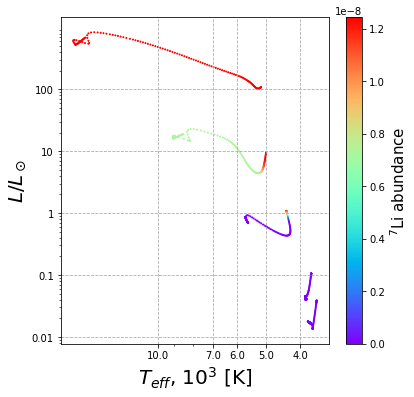

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

y = ax.scatter(np.power(10, star5['log_Teff']), np.power(10, star5['log_L']), 
        s=1, c=star5['surface_li7'], cmap='rainbow', 
               norm=norm, label=r'$M = 5 M_{\odot}$')
ax.scatter(np.power(10, star03['log_Teff']), np.power(10, star03['log_L']), 
        s=1, c=star03['surface_li7'], cmap='rainbow', norm=norm, label=r'$M = 0.3 M_{\odot}$')
ax.scatter(np.power(10, star05['log_Teff']), np.power(10, star05['log_L']), 
        s=1, c=star05['surface_li7'], cmap='rainbow', norm=norm, label=r'$M = 0.5 M_{\odot}$')
ax.scatter(np.power(10, star1['log_Teff']), np.power(10, star1['log_L']), 
        s=1, c=star1['surface_li7'], cmap='rainbow', norm=norm, label=r'$M = 1 M_{\odot}$')
ax.scatter(np.power(10, star2['log_Teff']), np.power(10, star2['log_L']), 
        s=1, c=star2['surface_li7'], cmap='rainbow', norm=norm, label=r'$M = 2 M_{\odot}$')

ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)
ax.set_xticks(     [4000, 5000, 6000, 7000, 10000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(y)
cb.set_label(r'$^7$Li abundance', fontsize=15)
plt.savefig(fig_dir / '3HR_Li.png', dpi=300, bbox_inches='tight')

In [14]:
li_min = min([star03['log_center_T'].values.min(), star05['log_center_T'].values.min(), star1['log_center_T'].values.min(), star2['log_center_T'].values.min(), star5['log_center_T'].values.min()])
li_max = max([star03['log_center_T'].values.max(), star05['log_center_T'].values.max(), star1['log_center_T'].values.max(), star2['log_center_T'].values.max(), star5['log_center_T'].values.max()])

In [15]:
norm=plt.Normalize(li_min, li_max)

<ipython-input-16-52d320377106>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
<ipython-input-16-52d320377106>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)
<ipython-input-16-52d320377106>:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(y)


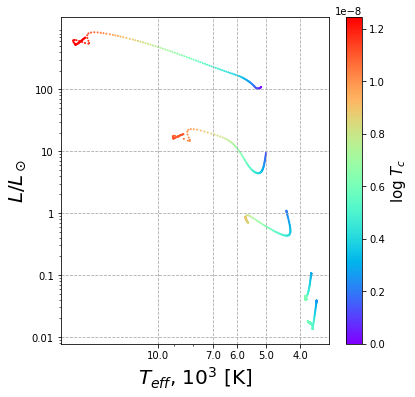

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.power(10, star03['log_Teff']), np.power(10, star03['log_L']), 
        s=1, c=star03['log_center_T'], cmap='rainbow', norm=norm, label=r'$M = 0.3 M_{\odot}$')
ax.scatter(np.power(10, star05['log_Teff']), np.power(10, star05['log_L']), 
        s=1, c=star05['log_center_T'], cmap='rainbow',  norm=norm,label=r'$M = 0.5 M_{\odot}$')
ax.scatter(np.power(10, star1['log_Teff']), np.power(10, star1['log_L']), 
        s=1, c=star1['log_center_T'], cmap='rainbow', norm=norm, label=r'$M = 1 M_{\odot}$')
ax.scatter(np.power(10, star2['log_Teff']), np.power(10, star2['log_L']), 
        s=1, c=star2['log_center_T'], cmap='rainbow',  norm=norm,label=r'$M = 2 M_{\odot}$')
ax.scatter(np.power(10, star5['log_Teff']), np.power(10, star5['log_L']), 
        s=1, c=star5['log_center_T'], cmap='rainbow',  norm=norm,label=r'$M = 5 M_{\odot}$')
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([1e-2, 1e-1, 1, 10, 100])
ax.set_yticks([1e-2, 1e-1, 1, 10, 100])
ax.set_xticklabels(np.array([4000, 5000, 6000, 7000, 10000]) / 1000)
ax.set_xticks(     [4000, 5000, 6000, 7000, 10000])
# plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)
cb = plt.colorbar(y)
cb.set_label(r'log $T_c$', fontsize=15)
plt.savefig(fig_dir / '3HR_logT.png', dpi=300, bbox_inches='tight')

In [17]:
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw0/LOGS/')

In [18]:
rho = 2e5 # g cm^-3
Y = 1
mu_I = 4
mu_e = 2# 5.48e-4 # g/mole
B = 9.739e5 # g cm^-3

In [19]:
T_max = (rho / mu_e / 6e-9) ** (2/3)

In [20]:
T_max / 1e8

6.524779401948098

In [21]:
from scipy.integrate import odeint
import numpy as np

def f(T, t):
    """this is the rhs of the ODE to integrate, i.e. dT/dt=f(T,t)"""
    x = (rho / mu_e / B) ** (1/3)
    return 5.1e8 * rho ** 2 * Y ** 3 * np.exp(-4.4027 / T * 1e9) / \
            (T ** 3 / 1e27 * (1.247e8 / mu_I + 1.35e5 / rho * T * x * (1 + x ** 2) **0.5 ))

T0 = 1.5e8            # initial value
a = - 4.93906e5            # integration limits for t
b = 0

t = np.linspace(a, b, int(1e8))  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, T0, t)  # actual computation of y(t)

In [22]:
T_max / 1e8

6.524779401948098

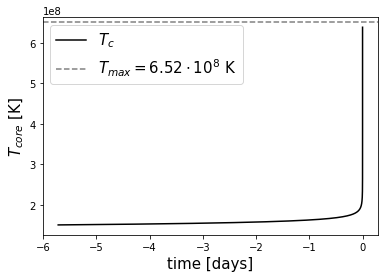

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(t[::10] / 3600 /24, y[::10], c='black', label=r'$T_c$')
ax.axhline(T_max, ls='--', c='gray', label=r'$T_{max} = 6.52 \cdot 10^8$ K')
ax.set_xlabel('time [days]', fontsize=15)
ax.set_ylabel(r'$T_{core}$ [K]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fig_dir / '3integration.png', dpi=300, bbox_inches='tight')

In [24]:
history = pd.read_csv(data_dir / '1M_copy.data', sep='\s+', header=2)
t_He_flash = history.loc[history['log_max_T'].argmax()]['star_age']
history['t-after-He-flash'] = history['star_age'] - t_He_flash

In [25]:
# why t_max is not the same? bc of cooling absense in a model

In [26]:
t_He_flash / 1e7

1249.440786606028

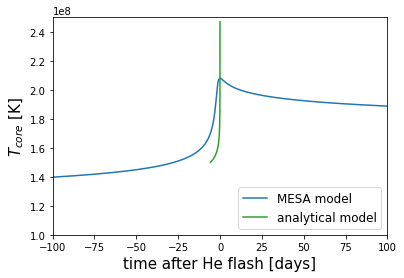

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(history['t-after-He-flash'] * 365, np.power(10, history['log_max_T']),c='tab:blue', label='MESA model')
ax.plot(t[::10][:-2100] / 3600 / 24 - 0.005 , y[::10][:-2100], c='tab:green', label='analytical model')
ax.set_xlim(-100, 100)
ax.set_ylim(1e8, 2.5e8)
plt.legend(loc='lower right', fontsize=12)
# plt.ylim(1e8, T_max)
# plt.xlim(-10000, t.max() + 100000)
# plt.xlim(1.2e10,history['star_age'].max())
# plt.axhline(T_max,c='gray', ls='--')

ax.set_xlabel('time after He flash [days]', fontsize=15)
ax.set_ylabel(r'$T_{core}$ [K]', fontsize=15)
plt.savefig(fig_dir / '3Heflash.png', dpi=300, bbox_inches='tight')

In [23]:
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw3/LOGS_no_neutrino/')

In [24]:
history_no_neutrino = pd.read_csv(data_dir / '1M.data', sep='\s+', header=4)

In [25]:
# history = pd.read_csv(data_dir / '1M.data', sep='\s+', header=4)
t_He_flash = history_no_neutrino.loc[history_no_neutrino['tri_alfa'].argmax(), 'star_age']
history_no_neutrino['t-after-He-flash'] = history_no_neutrino['star_age'] - t_He_flash

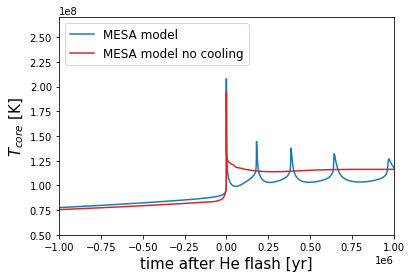

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(history['t-after-He-flash'], np.power(10, history['log_max_T']),c='tab:blue', label='MESA model')
ax.plot(history_no_neutrino['t-after-He-flash'], np.power(10, history_no_neutrino['log_max_T']),c='tab:red', label='MESA model no cooling')
#ax.plot(t[::10][:-2100] / 3600 / 24 / 365 - 0.005 , y[::10][:-2100], c='tab:green', label='analytical model')
# ax.set_xlim(-1e6, 1e6)
# ax.set_ylim(1e8, 2.5e8)
plt.legend(loc='upper left', fontsize=12)
plt.ylim(0.5e8, 2.7e8)
plt.xlim(-1e6, 1e6)
# plt.xlim(1.2e10,history['star_age'].max())
# plt.axhline(T_max,c='gray', ls='--')
ax.set_xlabel('time after He flash [yr]', fontsize=15)
ax.set_ylabel(r'$T_{core}$ [K]', fontsize=15)
plt.savefig(fig_dir / '3Heflash_noneutrino.png', dpi=300, bbox_inches='tight')